## $$\textbf{Taxa de Evasão de uma Empresa de Telecom} $$

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
url ='https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'

dados =pd.read_csv(url)
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [2]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

In [4]:
#modificação de forma manual 
traducao_dic = {'Sim': 1, 
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [5]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

#junção dos dados trasformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final.head()


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [14]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]


## BALANCEAMENTO DOS DADOS

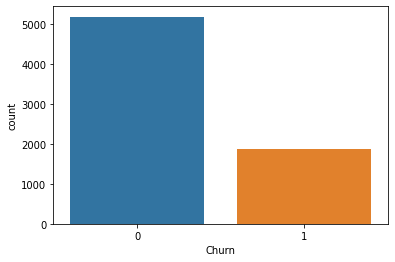

In [6]:
#variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

In [8]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE
#dividindo os dados em caracteristicas e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)
#junção dos dados balanceados
dados_final = pd.concat([X, y], axis=1)
#verificação 1 - junção dos dados
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,...,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,...,0,0,0,0,1,0,0,1,0,0


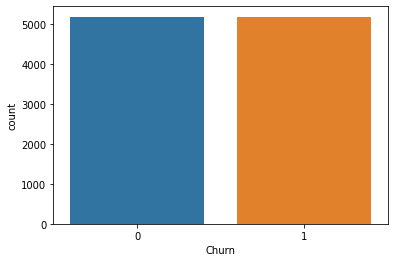

In [9]:
#verificação 2 - balanceamento
ax = sns.countplot(x='Churn', data=dados_final)

In [15]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))

In [16]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos  
knn = KNeighborsClassifier(metric='euclidean')

#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [17]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

#criamos o modelo
bnb = BernoulliNB(binarize=-0.44)
#escolho utilizar mediana, porque é o valor central dos nossos dados ordenados
np.median(X_treino)

#treinar o modelo
bnb.fit(X_treino, y_treino)

#testar o modelo
predito_BNb = bnb.predict(X_teste)

In [18]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

#instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

#treinar o modelo
dtc.fit(X_treino, y_treino)

predito_ArvoreDecisao = dtc.predict(X_teste)

In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_teste, predito_knn))


[[1241  328]
 [ 247 1289]]


In [20]:
print(confusion_matrix(y_teste, predito_BNb))


[[1050  519]
 [ 242 1294]]


In [23]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))


[[1249  320]
 [ 277 1259]]


In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
#modelo KNN
print(accuracy_score(y_teste, predito_knn))
#modelo KNN
print(precision_score(y_teste, predito_knn))

0.8148148148148148
0.7971552257266543


In [30]:
#modelo Bernoulli de naive bayes
print(accuracy_score(y_teste, predito_BNb))

#modelo Bernoulli de naive bayes
print(precision_score(y_teste, predito_BNb))


0.7549114331723027
0.7137341423055709


In [31]:
#modelo árvore de decisão
print(accuracy_score(y_teste, predito_ArvoreDecisao))
#modelo árvore de decisão
print(precision_score(y_teste, predito_ArvoreDecisao))

0.8077294685990338
0.7973400886637112


## ESCOLHENDO O MELHOR MODELO

In [32]:
#Exemplo - análise das precisões calculadas anteriormente
print('Modelo KNN: ', precision_score(y_teste, predito_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_teste, predito_BNb))
print('Modelo Árvore de Decisão: ', precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN:  0.7971552257266543
Modelo Bernoulli de Naive Bayes:  0.7137341423055709
Modelo Árvore de Decisão:  0.7973400886637112
